# Convergence de Suites et Séries
## Illustrations et Applications Pratiques

Ce notebook illustre les concepts de convergence de suites, séries, espaces complets, et espaces de Hilbert avec des exemples numériques et des visualisations.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import optimize
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Configuration pour de meilleurs graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

np.random.seed(42)

## 1. Convergence de Suites dans les Espaces Métriques

### Exemple 1.4 : Suite xₙ = 1/n converge vers 0

=== Convergence de xₙ = 1/n vers 0 ===

Pour chaque ε > 0, trouvons N tel que |1/n - 0| < ε pour n ≥ N

Cela équivaut à n > 1/ε

ε =  0.50 → N = ⌈1/ε⌉ =   2 → Pour n ≥ 2, |1/n| < 0.5
ε =  0.20 → N = ⌈1/ε⌉ =   5 → Pour n ≥ 5, |1/n| < 0.2
ε =  0.10 → N = ⌈1/ε⌉ =  10 → Pour n ≥ 10, |1/n| < 0.1
ε =  0.05 → N = ⌈1/ε⌉ =  20 → Pour n ≥ 20, |1/n| < 0.05


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4205416650.py:52: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4205416650.py:53: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.savefig('convergence_suite.png', dpi=300, bbox_inches='tight')
/Users/user/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


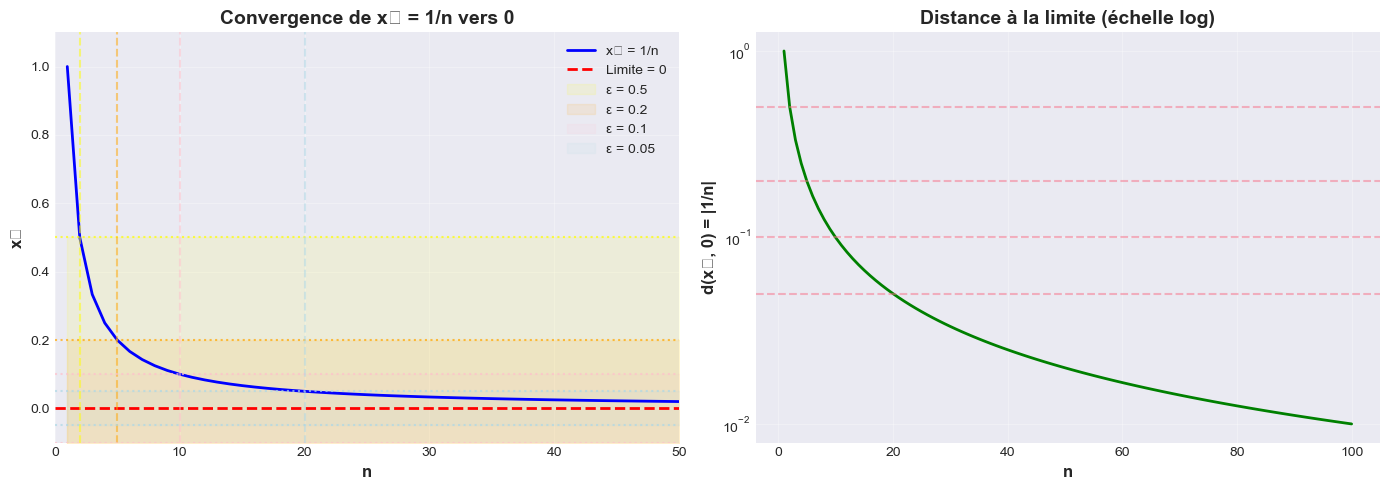

In [15]:
def suite_1_sur_n(n_terms=50):
    """Suite xₙ = 1/n"""
    n = np.arange(1, n_terms + 1)
    return n, 1/n

# Démonstration de la convergence
epsilon_values = [0.5, 0.2, 0.1, 0.05]
n, x_n = suite_1_sur_n(100)

print("=== Convergence de xₙ = 1/n vers 0 ===")
print("\nPour chaque ε > 0, trouvons N tel que |1/n - 0| < ε pour n ≥ N")
print("\nCela équivaut à n > 1/ε\n")

for epsilon in epsilon_values:
    N = int(np.ceil(1/epsilon))
    print(f"ε = {epsilon:5.2f} → N = ⌈1/ε⌉ = {N:3d} → Pour n ≥ {N}, |1/n| < {epsilon}")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Suite et bandes epsilon
ax1.plot(n, x_n, 'b-', linewidth=2, label='xₙ = 1/n')
ax1.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Limite = 0')

colors = ['yellow', 'orange', 'pink', 'lightblue']
for i, (eps, color) in enumerate(zip(epsilon_values, colors)):
    N = int(np.ceil(1/eps))
    ax1.axhline(y=eps, color=color, linestyle=':', alpha=0.7)
    ax1.axhline(y=-eps, color=color, linestyle=':', alpha=0.7)
    ax1.fill_between(n, -eps, eps, alpha=0.1, color=color, label=f'ε = {eps}')
    ax1.axvline(x=N, color=color, linestyle='--', alpha=0.5)

ax1.set_xlabel('n', fontweight='bold', fontsize=12)
ax1.set_ylabel('xₙ', fontweight='bold', fontsize=12)
ax1.set_title('Convergence de xₙ = 1/n vers 0', fontweight='bold', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 50])
ax1.set_ylim([-0.1, 1.1])

# Graphique 2: Distance à la limite
distance = np.abs(x_n - 0)
ax2.semilogy(n, distance, 'g-', linewidth=2)
ax2.set_xlabel('n', fontweight='bold', fontsize=12)
ax2.set_ylabel('d(xₙ, 0) = |1/n|', fontweight='bold', fontsize=12)
ax2.set_title('Distance à la limite (échelle log)', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3)

for eps in epsilon_values:
    ax2.axhline(y=eps, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('convergence_suite.png', dpi=300, bbox_inches='tight')
plt.show()

### Exemple 1.5 : Convergence dans ℝⁿ (convergence composante par composante)

=== Convergence dans ℝ³ ===

Suite x^(k) = (1/k, (-1)^k/k², 1 - 1/k)
Limite théorique : [0 0 1]

Premiers termes :
  k=1: x^(1) = [ 1. -1.  0.], distance = 1.7321
  k=2: x^(2) = [0.5  0.25 0.5 ], distance = 0.7500
  k=3: x^(3) = [ 0.33333333 -0.11111111  0.66666667], distance = 0.4843
  k=4: x^(4) = [0.25   0.0625 0.75  ], distance = 0.3590
  k=5: x^(5) = [ 0.2  -0.04  0.8 ], distance = 0.2857
  ...
  k=50: x^(50) = [2.0e-02 4.0e-04 9.8e-01], distance = 0.028287


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4263960580.py:62: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4263960580.py:62: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4263960580.py:62: UserWarning: Glyph 8323 (\N{SUBSCRIPT THREE}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4263960580.py:62: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4263960580.py:63: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.savefig('convergence_Rn.png', dpi=300, bbox_inches='tight')
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/426

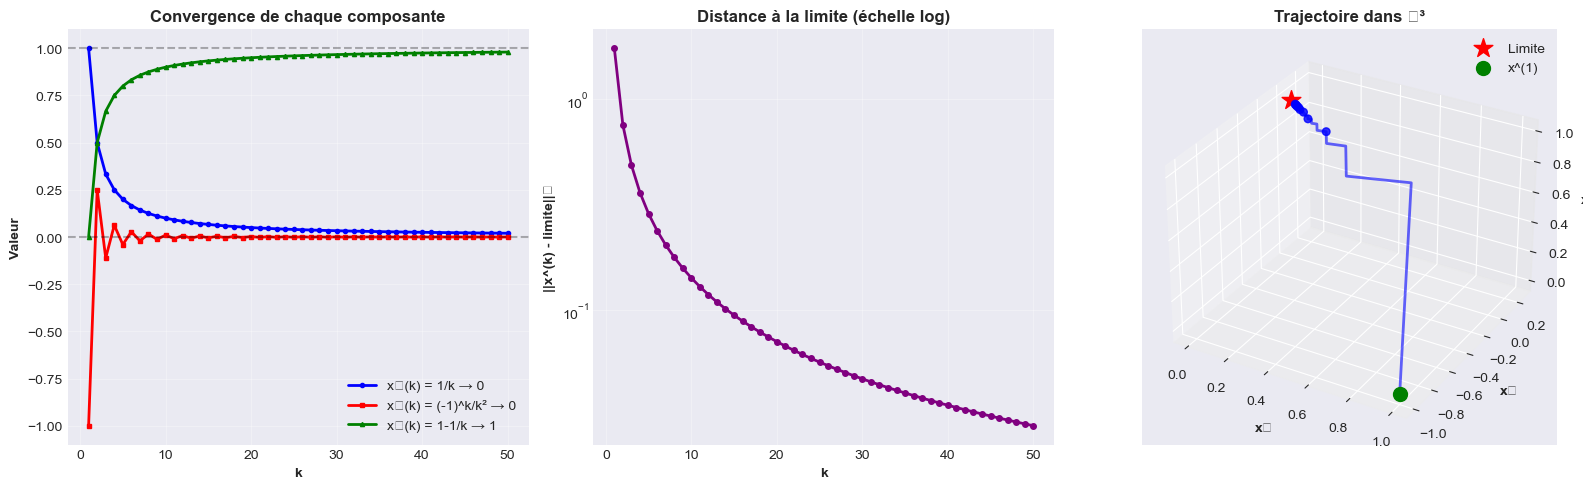

In [17]:
# Suite dans R^3
def suite_R3(k):
    """Suite dans R³ : x^(k) = (1/k, (-1)^k/k², 1 - 1/k)"""
    x1 = 1/k
    x2 = ((-1)**k) / (k**2)
    x3 = 1 - 1/k
    return np.array([x1, x2, x3])

# Générer la suite
k_values = np.arange(1, 51)
suite = np.array([suite_R3(k) for k in k_values])
limite = np.array([0, 0, 1])

# Calculer les distances
distances = [np.linalg.norm(x - limite) for x in suite]

print("=== Convergence dans ℝ³ ===")
print(f"\nSuite x^(k) = (1/k, (-1)^k/k², 1 - 1/k)")
print(f"Limite théorique : {limite}")
print(f"\nPremiers termes :")
for i in range(5):
    print(f"  k={i+1}: x^({i+1}) = {suite[i]}, distance = {distances[i]:.4f}")
print(f"  ...")
print(f"  k=50: x^(50) = {suite[49]}, distance = {distances[49]:.6f}")

# Visualisation
fig = plt.figure(figsize=(16, 5))

# Sous-graphique 1: Convergence de chaque composante
ax1 = fig.add_subplot(131)
ax1.plot(k_values, suite[:, 0], 'b-', linewidth=2, marker='o', markersize=3, label='x₁(k) = 1/k → 0')
ax1.plot(k_values, suite[:, 1], 'r-', linewidth=2, marker='s', markersize=3, label='x₂(k) = (-1)^k/k² → 0')
ax1.plot(k_values, suite[:, 2], 'g-', linewidth=2, marker='^', markersize=3, label='x₃(k) = 1-1/k → 1')
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.axhline(y=1, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('k', fontweight='bold')
ax1.set_ylabel('Valeur', fontweight='bold')
ax1.set_title('Convergence de chaque composante', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Sous-graphique 2: Distance à la limite
ax2 = fig.add_subplot(132)
ax2.semilogy(k_values, distances, 'purple', linewidth=2, marker='o', markersize=4)
ax2.set_xlabel('k', fontweight='bold')
ax2.set_ylabel('||x^(k) - limite||₂', fontweight='bold')
ax2.set_title('Distance à la limite (échelle log)', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Sous-graphique 3: Trajectoire 3D
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(suite[:, 0], suite[:, 1], suite[:, 2], 'b-', linewidth=2, alpha=0.6)
ax3.scatter(suite[::5, 0], suite[::5, 1], suite[::5, 2], c='blue', s=30, alpha=0.8)
ax3.scatter(*limite, c='red', s=200, marker='*', label='Limite')
ax3.scatter(*suite[0], c='green', s=100, marker='o', label='x^(1)')
ax3.set_xlabel('x₁', fontweight='bold')
ax3.set_ylabel('x₂', fontweight='bold')
ax3.set_zlabel('x₃', fontweight='bold')
ax3.set_title('Trajectoire dans ℝ³', fontweight='bold')
ax3.legend()

plt.tight_layout()
plt.savefig('convergence_Rn.png', dpi=300, bbox_inches='tight')
plt.show()

### Application 1.4 : Convergence d'algorithmes - Descente de Gradient

=== Convergence de la Descente de Gradient ===

Fonction : f(θ) = (θ₁ - 2)² + (θ₂ - 3)²
Optimum théorique : θ* = [2. 3.]
Point initial : θ^(0) = [0. 0.]
Taux d'apprentissage : α = 0.1

Itérations :
  k= 0: θ = [0. 0.], distance = 3.605551
  k= 1: θ = [0.4 0.6], distance = 2.884441
  k= 2: θ = [0.72 1.08], distance = 2.307553
  k= 5: θ = [1.34464 2.01696], distance = 1.181467
  k=10: θ = [1.78525164 2.67787745], distance = 0.387143
  k=20: θ = [1.97694157 2.96541235], distance = 0.041569
  k=50: θ = [1.99997146 2.99995718], distance = 0.000051


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3189380063.py:75: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3189380063.py:75: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3189380063.py:76: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.savefig('convergence_gradient.png', dpi=300, bbox_inches='tight')
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3189380063.py:76: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.savefig('convergence_gradient.png', dpi=300, bbox_inches='tight')


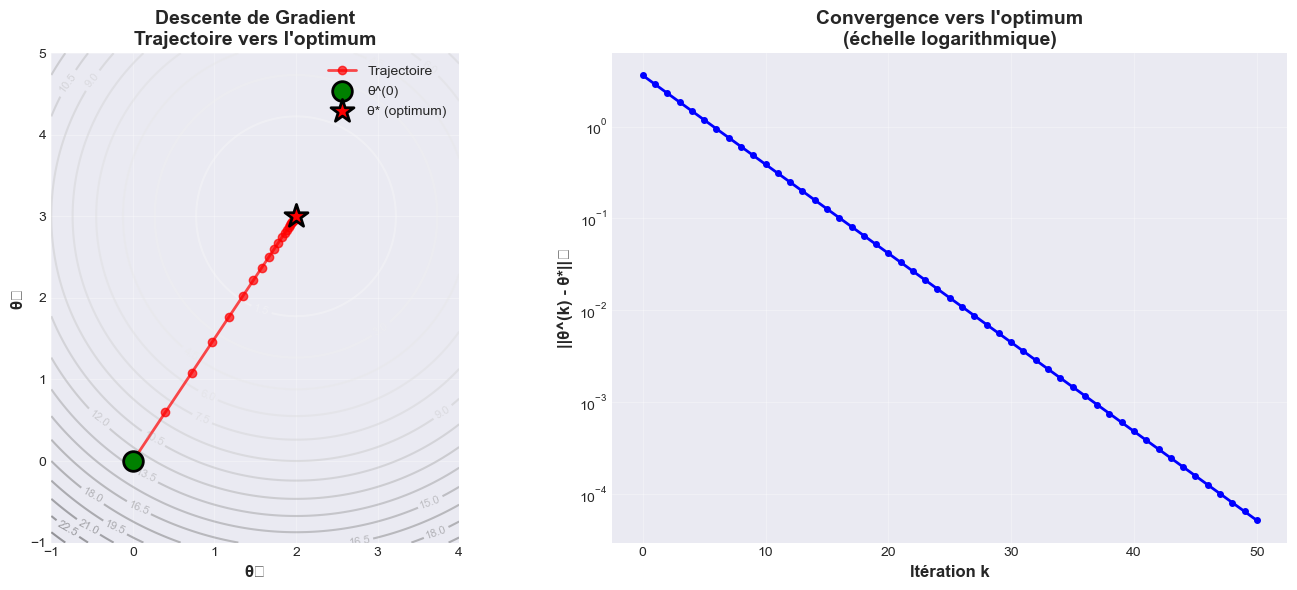


✓ L'algorithme converge vers θ* = [2. 3.]


In [19]:
def fonction_objectif(theta):
    """Fonction objectif : f(θ) = (θ₁ - 2)² + (θ₂ - 3)²"""
    return (theta[0] - 2)**2 + (theta[1] - 3)**2

def gradient(theta):
    """Gradient de la fonction objectif"""
    return np.array([2*(theta[0] - 2), 2*(theta[1] - 3)])

def descente_gradient(theta_init, alpha, n_iterations):
    """Descente de gradient : θ^(k+1) = θ^(k) - α∇f(θ^(k))"""
    theta = theta_init.copy()
    historique = [theta.copy()]
    
    for _ in range(n_iterations):
        theta = theta - alpha * gradient(theta)
        historique.append(theta.copy())
    
    return np.array(historique)

# Paramètres
theta_init = np.array([0.0, 0.0])
theta_star = np.array([2.0, 3.0])  # Optimum
alpha = 0.1
n_iter = 50

# Exécuter la descente de gradient
historique = descente_gradient(theta_init, alpha, n_iter)

# Calculer les distances à l'optimum
distances = [np.linalg.norm(theta - theta_star) for theta in historique]

print("=== Convergence de la Descente de Gradient ===")
print(f"\nFonction : f(θ) = (θ₁ - 2)² + (θ₂ - 3)²")
print(f"Optimum théorique : θ* = {theta_star}")
print(f"Point initial : θ^(0) = {theta_init}")
print(f"Taux d'apprentissage : α = {alpha}")
print(f"\nItérations :")
for i in [0, 1, 2, 5, 10, 20, 50]:
    print(f"  k={i:2d}: θ = {historique[i]}, distance = {distances[i]:.6f}")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Trajectoire de la descente
# Créer une grille pour le contour
x1 = np.linspace(-1, 4, 100)
x2 = np.linspace(-1, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = (X1 - 2)**2 + (X2 - 3)**2

contour = ax1.contour(X1, X2, Z, levels=20, alpha=0.4)
ax1.clabel(contour, inline=True, fontsize=8)
ax1.plot(historique[:, 0], historique[:, 1], 'ro-', linewidth=2, 
         markersize=6, alpha=0.7, label='Trajectoire')
ax1.scatter(*theta_init, c='green', s=200, marker='o', 
           edgecolors='black', linewidth=2, label='θ^(0)', zorder=5)
ax1.scatter(*theta_star, c='red', s=300, marker='*', 
           edgecolors='black', linewidth=2, label='θ* (optimum)', zorder=5)
ax1.set_xlabel('θ₁', fontweight='bold', fontsize=12)
ax1.set_ylabel('θ₂', fontweight='bold', fontsize=12)
ax1.set_title('Descente de Gradient\nTrajectoire vers l\'optimum', 
             fontweight='bold', fontsize=14)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Graphique 2: Distance à l'optimum
ax2.semilogy(range(len(distances)), distances, 'b-', linewidth=2, marker='o', markersize=4)
ax2.set_xlabel('Itération k', fontweight='bold', fontsize=12)
ax2.set_ylabel('||θ^(k) - θ*||₂', fontweight='bold', fontsize=12)
ax2.set_title('Convergence vers l\'optimum\n(échelle logarithmique)', 
             fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('convergence_gradient.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ L'algorithme converge vers θ* = {theta_star}")

## 2. Unicité de la Limite et Caractère Borné

=== Propriétés des Suites Convergentes ===

1. Unicité de la limite : Si xₙ converge, sa limite est UNIQUE

2. Caractère borné : Toute suite convergente est BORNÉE
   ATTENTION : La réciproque est FAUSSE !

Contre-exemple : xₙ = (-1)ⁿ
  • Bornée : |xₙ| ≤ 1 pour tout n
  • Non convergente : oscille entre -1 et +1
  • Premiers termes : [-1  1 -1  1 -1  1 -1  1 -1  1]


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3151574928.py:41: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3151574928.py:42: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.savefig('proprietes_suites.png', dpi=300, bbox_inches='tight')


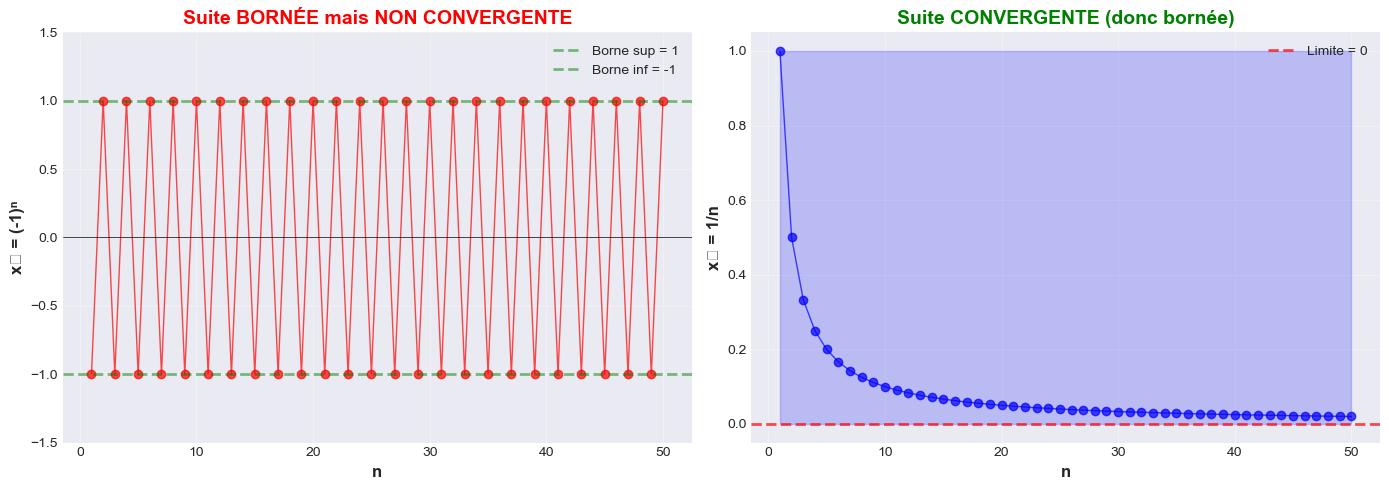

In [21]:
# Illustration du contre-exemple : suite bornée non convergente
n = np.arange(1, 101)
x_n_oscillante = (-1)**n  # Suite oscillante
x_n_convergente = 1/n      # Suite convergente

print("=== Propriétés des Suites Convergentes ===")
print("\n1. Unicité de la limite : Si xₙ converge, sa limite est UNIQUE")
print("\n2. Caractère borné : Toute suite convergente est BORNÉE")
print("   ATTENTION : La réciproque est FAUSSE !\n")

print("Contre-exemple : xₙ = (-1)ⁿ")
print(f"  • Bornée : |xₙ| ≤ 1 pour tout n")
print(f"  • Non convergente : oscille entre -1 et +1")
print(f"  • Premiers termes : {x_n_oscillante[:10]}")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Suite oscillante (bornée mais non convergente)
ax1.plot(n[:50], x_n_oscillante[:50], 'ro-', linewidth=1, markersize=6, alpha=0.7)
ax1.axhline(y=1, color='g', linestyle='--', linewidth=2, alpha=0.5, label='Borne sup = 1')
ax1.axhline(y=-1, color='g', linestyle='--', linewidth=2, alpha=0.5, label='Borne inf = -1')
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.set_xlabel('n', fontweight='bold', fontsize=12)
ax1.set_ylabel('xₙ = (-1)ⁿ', fontweight='bold', fontsize=12)
ax1.set_title('Suite BORNÉE mais NON CONVERGENTE', fontweight='bold', fontsize=14, color='red')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim([-1.5, 1.5])

# Suite convergente (donc bornée)
ax2.plot(n[:50], x_n_convergente[:50], 'bo-', linewidth=1, markersize=6, alpha=0.7)
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2, alpha=0.7, label='Limite = 0')
ax2.fill_between(n[:50], 0, x_n_convergente[:50].max(), alpha=0.2, color='blue')
ax2.set_xlabel('n', fontweight='bold', fontsize=12)
ax2.set_ylabel('xₙ = 1/n', fontweight='bold', fontsize=12)
ax2.set_title('Suite CONVERGENTE (donc bornée)', fontweight='bold', fontsize=14, color='green')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('proprietes_suites.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Suites de Cauchy et Espaces Complets

=== Suites de Cauchy ===

Définition : Suite (xₙ) est de Cauchy si
  ∀ε > 0, ∃N, ∀m,n ≥ N : d(xₘ, xₙ) < ε

Théorème : Toute suite CONVERGENTE est de CAUCHY

Exemple avec xₙ = 1/n :
  ε =  0.10 → N =   8 (pour m,n ≥ 8, |xₘ - xₙ| < 0.1)
  ε =  0.05 → N =  13 (pour m,n ≥ 13, |xₘ - xₙ| < 0.05)
  ε =  0.01 → N =  36 (pour m,n ≥ 36, |xₘ - xₙ| < 0.01)

=== Exemple : ℚ n'est pas complet ===

Suite approximant √2 dans ℚ :
  x_1 = 1
  x_2 = 1.4
  x_3 = 1.41
  x_4 = 1.414
  x_5 = 1.4142
  x_6 = 1.41421
  x_7 = 1.414213

Cette suite est de Cauchy dans ℚ mais converge vers √2 ≈ 1.414214 ∉ ℚ
Donc ℚ n'est PAS complet !


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:81: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:81: UserWarning: Glyph 8330 (\N{SUBSCRIPT PLUS SIGN}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:81: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:81: UserWarning: Glyph 8474 (\N{DOUBLE-STRUCK CAPITAL Q}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:81: UserWarning: Glyph 8713 (\N{NOT AN ELEMENT OF}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/4048128320.py:82: UserW

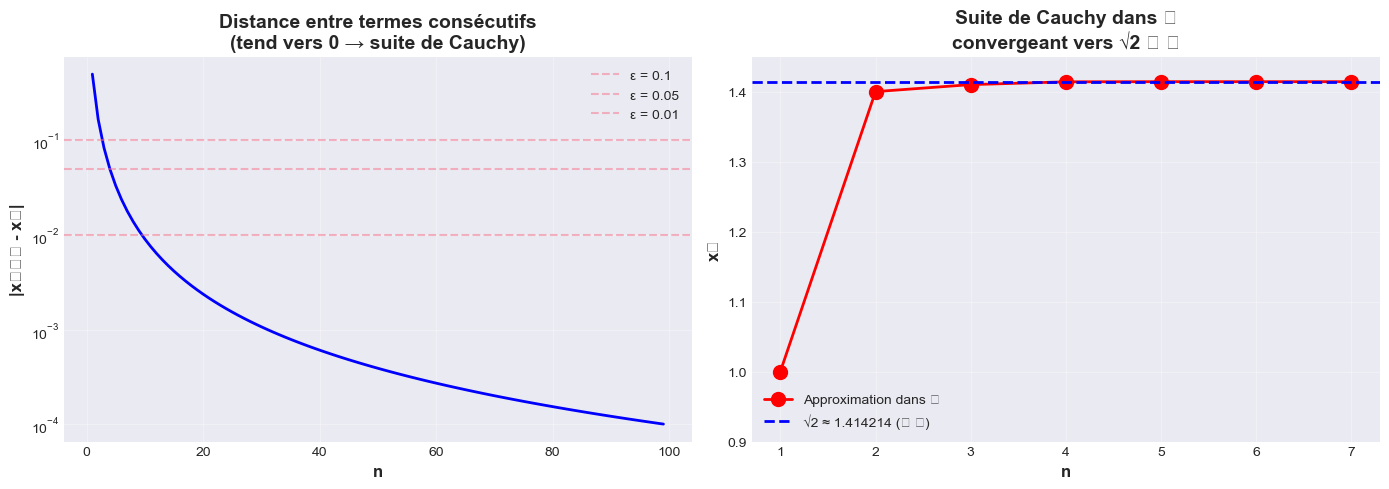


=== Espaces Complets ===

Définition : Espace complet = toute suite de Cauchy converge

Exemples d'espaces complets :
  ✓ ℝⁿ avec n'importe quelle norme (Théorème)
  ✓ ℝ (complétion de ℚ)
  ✓ C([0,1]) avec ||f||∞ = max|f(x)|

Espaces NON complets :
  ✗ ℚ (les rationnels)


In [22]:
def est_cauchy(suite, epsilon, debut=0):
    """Vérifie si une suite est de Cauchy pour un epsilon donné"""
    n = len(suite)
    for i in range(debut, n):
        for j in range(i, n):
            if np.linalg.norm(suite[i] - suite[j]) >= epsilon:
                return False, i
    return True, n

# Suite convergente (donc de Cauchy) : xₙ = 1/n
n_terms = 100
suite_convergente = 1 / np.arange(1, n_terms + 1)

# Calculer les distances entre termes
distances_cauchy = []
for i in range(1, n_terms):
    dist = abs(suite_convergente[i] - suite_convergente[i-1])
    distances_cauchy.append(dist)

print("=== Suites de Cauchy ===")
print("\nDéfinition : Suite (xₙ) est de Cauchy si")
print("  ∀ε > 0, ∃N, ∀m,n ≥ N : d(xₘ, xₙ) < ε")
print("\nThéorème : Toute suite CONVERGENTE est de CAUCHY")
print("\nExemple avec xₙ = 1/n :")

epsilon_values = [0.1, 0.05, 0.01]
for eps in epsilon_values:
    # Trouver N tel que pour m, n ≥ N : |1/m - 1/n| < ε
    N_found = False
    for N in range(1, n_terms):
        is_cauchy = True
        for m in range(N, min(N+20, n_terms)):
            for n in range(m, min(N+20, n_terms)):
                if abs(1/m - 1/n) >= eps:
                    is_cauchy = False
                    break
            if not is_cauchy:
                break
        if is_cauchy:
            print(f"  ε = {eps:5.2f} → N = {N:3d} (pour m,n ≥ {N}, |xₘ - xₙ| < {eps})")
            break

# Exemple : ℚ n'est pas complet (approximation de √2)
print("\n=== Exemple : ℚ n'est pas complet ===")
print("\nSuite approximant √2 dans ℚ :")
racine_2_approx = [1, 1.4, 1.41, 1.414, 1.4142, 1.41421, 1.414213]
for i, val in enumerate(racine_2_approx):
    print(f"  x_{i+1} = {val}")
print(f"\nCette suite est de Cauchy dans ℚ mais converge vers √2 ≈ {np.sqrt(2):.6f} ∉ ℚ")
print("Donc ℚ n'est PAS complet !")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Distance entre termes consécutifs
ax1.plot(range(1, len(distances_cauchy)+1), distances_cauchy, 'b-', linewidth=2)
ax1.set_xlabel('n', fontweight='bold', fontsize=12)
ax1.set_ylabel('|xₙ₊₁ - xₙ|', fontweight='bold', fontsize=12)
ax1.set_title('Distance entre termes consécutifs\n(tend vers 0 → suite de Cauchy)', 
             fontweight='bold', fontsize=14)
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)

for eps in epsilon_values:
    ax1.axhline(y=eps, linestyle='--', alpha=0.5, label=f'ε = {eps}')
ax1.legend()

# Graphique 2: Approximation de √2
racine_2_suite = np.array(racine_2_approx)
n_approx = np.arange(1, len(racine_2_suite) + 1)
ax2.plot(n_approx, racine_2_suite, 'ro-', linewidth=2, markersize=10, label='Approximation dans ℚ')
ax2.axhline(y=np.sqrt(2), color='blue', linestyle='--', linewidth=2, label=f'√2 ≈ {np.sqrt(2):.6f} (∉ ℚ)')
ax2.set_xlabel('n', fontweight='bold', fontsize=12)
ax2.set_ylabel('xₙ', fontweight='bold', fontsize=12)
ax2.set_title('Suite de Cauchy dans ℚ\nconvergeant vers √2 ∉ ℚ', 
             fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0.9, 1.45])

plt.tight_layout()
plt.savefig('suites_cauchy.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Espaces Complets ===")
print("\nDéfinition : Espace complet = toute suite de Cauchy converge")
print("\nExemples d'espaces complets :")
print("  ✓ ℝⁿ avec n'importe quelle norme (Théorème)")
print("  ✓ ℝ (complétion de ℚ)")
print("  ✓ C([0,1]) avec ||f||∞ = max|f(x)|")
print("\nEspaces NON complets :")
print("  ✗ ℚ (les rationnels)")

## 4. Séries Numériques

### Exemple 1.8 : Série Géométrique

=== Série Géométrique Σ rⁿ ===

Formule : Σ(n=0 to ∞) rⁿ = 1/(1-r) si |r| < 1
          Diverge si |r| ≥ 1

r =   0.5 : |r| < 1 → Converge vers 1/(1-r) = 2.0000
           S₅₀ = 2.0000 (proche de la limite)
r =   0.8 : |r| < 1 → Converge vers 1/(1-r) = 5.0000
           S₅₀ = 4.9999 (proche de la limite)
r =  -0.5 : |r| < 1 → Converge vers 1/(1-r) = 0.6667
           S₅₀ = 0.6667 (proche de la limite)
r =   1.1 : |r| ≥ 1 → DIVERGE

=== Application Financière : Rente Perpétuelle ===

Rente perpétuelle de 1000€/an
Taux d'actualisation : 5.0%
Facteur d'actualisation r = 1/(1+0.05) = 0.9524

Valeur Actuelle Nette = 1000 × 1/(1-0.9524) = 21000.00€


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2203178338.py:64: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2203178338.py:65: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.savefig('serie_geometrique.png', dpi=300, bbox_inches='tight')


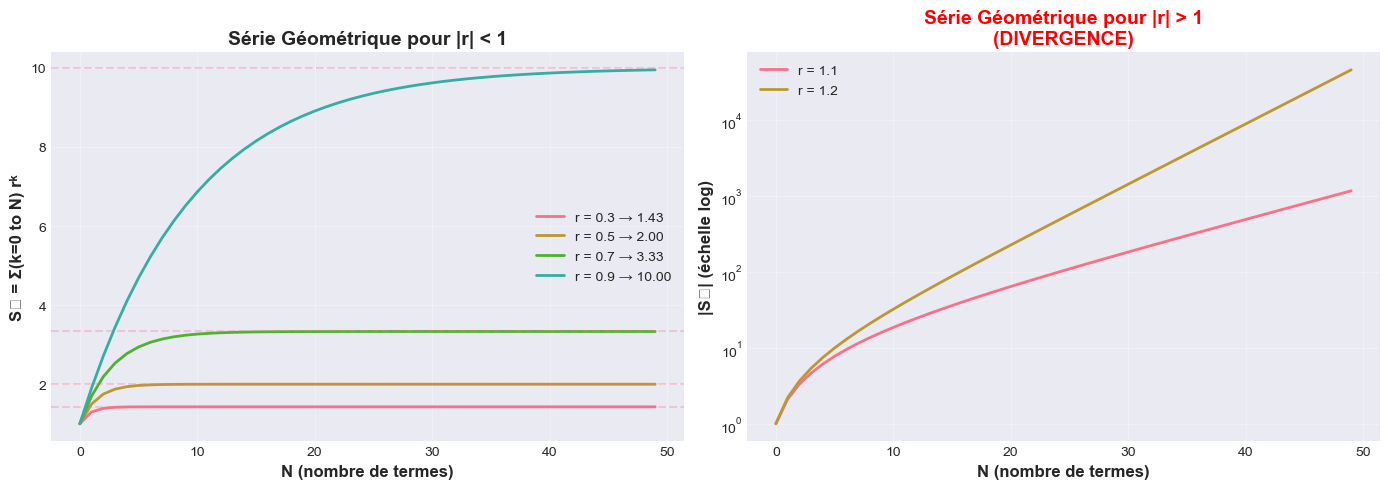

In [23]:
def somme_partielle_geometrique(r, N):
    """Calcule la somme partielle Sₙ = Σ(k=0 to N) r^k"""
    if abs(r) == 1:
        return N + 1 if r == 1 else None
    return (1 - r**(N+1)) / (1 - r)

# Différentes valeurs de r
r_values = [0.5, 0.8, -0.5, 1.1]
N = np.arange(0, 50)

print("=== Série Géométrique Σ rⁿ ===")
print("\nFormule : Σ(n=0 to ∞) rⁿ = 1/(1-r) si |r| < 1")
print("          Diverge si |r| ≥ 1\n")

for r in r_values:
    if abs(r) < 1:
        limite_theorique = 1 / (1 - r)
        S_50 = somme_partielle_geometrique(r, 49)
        print(f"r = {r:5.1f} : |r| < 1 → Converge vers 1/(1-r) = {limite_theorique:.4f}")
        print(f"           S₅₀ = {S_50:.4f} (proche de la limite)")
    else:
        print(f"r = {r:5.1f} : |r| ≥ 1 → DIVERGE")

# Application financière
print("\n=== Application Financière : Rente Perpétuelle ===")
paiement_annuel = 1000  # €
taux_actualisation = 0.05  # 5%
r = 1 / (1 + taux_actualisation)

VAN = paiement_annuel * (1 / (1 - r))
print(f"\nRente perpétuelle de {paiement_annuel}€/an")
print(f"Taux d'actualisation : {taux_actualisation*100}%")
print(f"Facteur d'actualisation r = 1/(1+{taux_actualisation}) = {r:.4f}")
print(f"\nValeur Actuelle Nette = {paiement_annuel} × 1/(1-{r:.4f}) = {VAN:.2f}€")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Convergence pour différentes valeurs de r
for r in [0.3, 0.5, 0.7, 0.9]:
    sommes_partielles = [somme_partielle_geometrique(r, n) for n in N]
    limite = 1 / (1 - r)
    ax1.plot(N, sommes_partielles, linewidth=2, label=f'r = {r} → {limite:.2f}')
    ax1.axhline(y=limite, linestyle='--', alpha=0.3)

ax1.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Sₙ = Σ(k=0 to N) rᵏ', fontweight='bold', fontsize=12)
ax1.set_title('Série Géométrique pour |r| < 1', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Graphique 2: Divergence pour |r| ≥ 1
for r in [1.1, 1.2]:
    sommes_partielles = [abs(somme_partielle_geometrique(r, n)) for n in N]
    ax2.semilogy(N, sommes_partielles, linewidth=2, label=f'r = {r}')

ax2.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax2.set_ylabel('|Sₙ| (échelle log)', fontweight='bold', fontsize=12)
ax2.set_title('Série Géométrique pour |r| > 1\n(DIVERGENCE)', 
             fontweight='bold', fontsize=14, color='red')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('serie_geometrique.png', dpi=300, bbox_inches='tight')
plt.show()

### Exemple 1.9 : Série Exponentielle

=== Série Exponentielle Σ xⁿ/n! ===

Théorème : Σ(n=0 to ∞) xⁿ/n! = eˣ pour tout x ∈ ℝ
(Convergence absolue)

x =  0.5 : S₂₀ = 1.648721, eˣ = 1.648721, erreur = 2.22e-16
x =  1.0 : S₂₀ = 2.718282, eˣ = 2.718282, erreur = 4.44e-16
x =  2.0 : S₂₀ = 7.389056, eˣ = 7.389056, erreur = 4.44e-14
x =  3.0 : S₂₀ = 20.085537, eˣ = 20.085537, erreur = 2.37e-10
x = -1.0 : S₂₀ = 0.367879, eˣ = 0.367879, erreur = 1.11e-16


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3825611056.py:48: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/3825611056.py:49: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.savefig('serie_exponentielle.png', dpi=300, bbox_inches='tight')


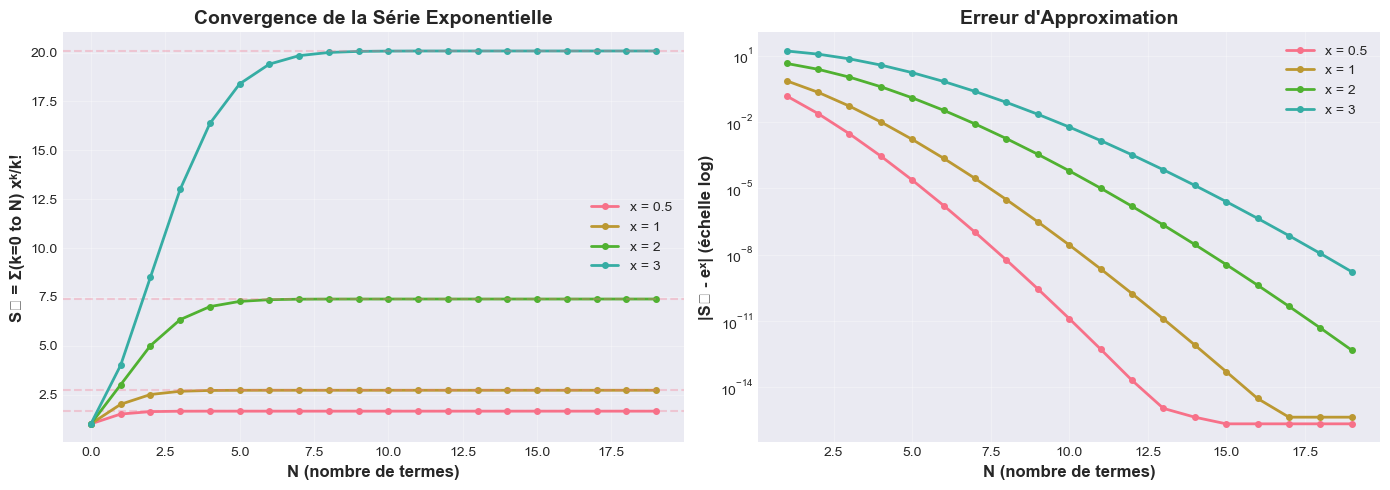

In [24]:
from scipy.special import factorial

def serie_exponentielle(x, N):
    """Calcule Σ(n=0 to N) xⁿ/n!"""
    return np.sum([x**n / factorial(n) for n in range(N+1)])

# Différentes valeurs de x
x_values = [0.5, 1, 2, 3, -1]
N_max = 20

print("=== Série Exponentielle Σ xⁿ/n! ===")
print("\nThéorème : Σ(n=0 to ∞) xⁿ/n! = eˣ pour tout x ∈ ℝ")
print("(Convergence absolue)\n")

for x in x_values:
    S_20 = serie_exponentielle(x, 20)
    exp_x = np.exp(x)
    erreur = abs(S_20 - exp_x)
    print(f"x = {x:4.1f} : S₂₀ = {S_20:.6f}, eˣ = {exp_x:.6f}, erreur = {erreur:.2e}")

# Visualisation de la convergence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Convergence de la série pour différentes valeurs de x
N = np.arange(0, 20)
for x in [0.5, 1, 2, 3]:
    sommes = [serie_exponentielle(x, n) for n in N]
    ax1.plot(N, sommes, linewidth=2, marker='o', markersize=4, label=f'x = {x}')
    ax1.axhline(y=np.exp(x), linestyle='--', alpha=0.3)

ax1.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Sₙ = Σ(k=0 to N) xᵏ/k!', fontweight='bold', fontsize=12)
ax1.set_title('Convergence de la Série Exponentielle', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Graphique 2: Erreur en fonction de N
for x in [0.5, 1, 2, 3]:
    erreurs = [abs(serie_exponentielle(x, n) - np.exp(x)) for n in N[1:]]
    ax2.semilogy(N[1:], erreurs, linewidth=2, marker='o', markersize=4, label=f'x = {x}')

ax2.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax2.set_ylabel('|Sₙ - eˣ| (échelle log)', fontweight='bold', fontsize=12)
ax2.set_title('Erreur d\'Approximation', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('serie_exponentielle.png', dpi=300, bbox_inches='tight')
plt.show()

### Exemple 1.10 : Série Alternée (Convergence Conditionnelle)

=== Série Alternée (Convergence Conditionnelle) ===

Série : Σ(n=1 to ∞) (-1)^(n+1)/n = 1 - 1/2 + 1/3 - 1/4 + ...

Converge vers ln(2) ≈ 0.693147 (critère de Leibniz)
S₁₀₀ = 0.688172

MAIS la série des valeurs absolues Σ|(-1)^(n+1)/n| = Σ1/n DIVERGE
(série harmonique)
S₁₀₀ (harmonique) = 5.187378 et continue à croître

Conclusion : La série alternée converge CONDITIONNELLEMENT
(converge mais ne converge pas absolument)


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/757806254.py:58: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/757806254.py:59: UserWarning: Glyph 8345 (\N{LATIN SUBSCRIPT SMALL LETTER N}) missing from current font.
  plt.savefig('convergence_conditionnelle.png', dpi=300, bbox_inches='tight')


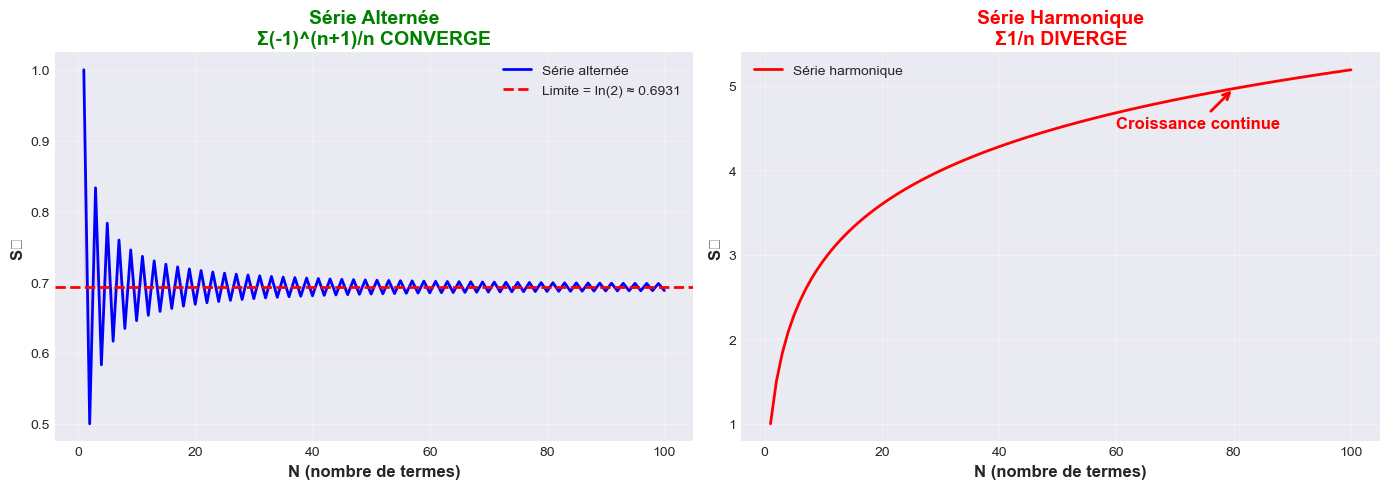

In [26]:
def serie_alternee(N):
    """Calcule Σ(n=1 to N) (-1)^(n+1)/n"""
    return np.sum([(-1)**(n+1) / n for n in range(1, N+1)])

def serie_harmonique(N):
    """Calcule Σ(n=1 to N) 1/n"""
    return np.sum([1/n for n in range(1, N+1)])

# Calculer les sommes partielles
N_values = np.arange(1, 101)
sommes_alternee = [serie_alternee(n) for n in N_values]
sommes_harmonique = [serie_harmonique(n) for n in N_values]

# La limite est ln(2)
limite_alternee = np.log(2)

print("=== Série Alternée (Convergence Conditionnelle) ===")
print("\nSérie : Σ(n=1 to ∞) (-1)^(n+1)/n = 1 - 1/2 + 1/3 - 1/4 + ...")
print(f"\nConverge vers ln(2) ≈ {limite_alternee:.6f} (critère de Leibniz)")
print(f"S₁₀₀ = {sommes_alternee[-1]:.6f}\n")

print("MAIS la série des valeurs absolues Σ|(-1)^(n+1)/n| = Σ1/n DIVERGE")
print("(série harmonique)")
print(f"S₁₀₀ (harmonique) = {sommes_harmonique[-1]:.6f} et continue à croître\n")

print("Conclusion : La série alternée converge CONDITIONNELLEMENT")
print("(converge mais ne converge pas absolument)")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique 1: Série alternée (converge)
ax1.plot(N_values, sommes_alternee, 'b-', linewidth=2, label='Série alternée')
ax1.axhline(y=limite_alternee, color='r', linestyle='--', linewidth=2, 
           label=f'Limite = ln(2) ≈ {limite_alternee:.4f}')
ax1.fill_between(N_values, sommes_alternee, limite_alternee, alpha=0.2)
ax1.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Sₙ', fontweight='bold', fontsize=12)
ax1.set_title('Série Alternée\nΣ(-1)^(n+1)/n CONVERGE', 
             fontweight='bold', fontsize=14, color='green')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Graphique 2: Série harmonique (diverge)
ax2.plot(N_values, sommes_harmonique, 'r-', linewidth=2, label='Série harmonique')
ax2.set_xlabel('N (nombre de termes)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Sₙ', fontweight='bold', fontsize=12)
ax2.set_title('Série Harmonique\nΣ1/n DIVERGE', 
             fontweight='bold', fontsize=14, color='red')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.annotate('Croissance continue', 
            xy=(80, sommes_harmonique[79]), 
            xytext=(60, 4.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.savefig('convergence_conditionnelle.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Espaces de Hilbert et Produit Scalaire

### Produit Scalaire sur ℝⁿ

=== Produit Scalaire et Espace de Hilbert ===

Définition : ℝⁿ avec ⟨x,y⟩ = Σxᵢyᵢ est un espace de Hilbert

Exemples :
x = [3 4], y = [1 2]

⟨x,y⟩ = 11
||x|| = √⟨x,x⟩ = 5.0000
||y|| = 2.2361

=== Inégalité de Cauchy-Schwarz ===

Théorème : |⟨x,y⟩| ≤ ||x|| · ||y||
avec égalité ⟺ x et y colinéaires

Vecteurs x et y (NON colinéaires) :
  |⟨x,y⟩| = 11.0000
  ||x|| · ||y|| = 11.1803
  11.0000 < 11.1803 ✓ (inégalité stricte)

Vecteurs x et z (COLINÉAIRES, z = 2x) :
  |⟨x,z⟩| = 50.0000
  ||x|| · ||z|| = 50.0000
  50.0000 = 50.0000 ✓ (ÉGALITÉ)

Angle entre x et y : 10.30°


/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2587833453.py:100: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2587833453.py:100: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2587833453.py:100: UserWarning: Glyph 8477 (\N{DOUBLE-STRUCK CAPITAL R}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2587833453.py:100: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/2587833453.py:100: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from current font.
  plt.tight_layout()
/var/folders/lz/9c7t3_b17kng7zmxx2k1t9br0000gn/T/ipykernel_50504/258783

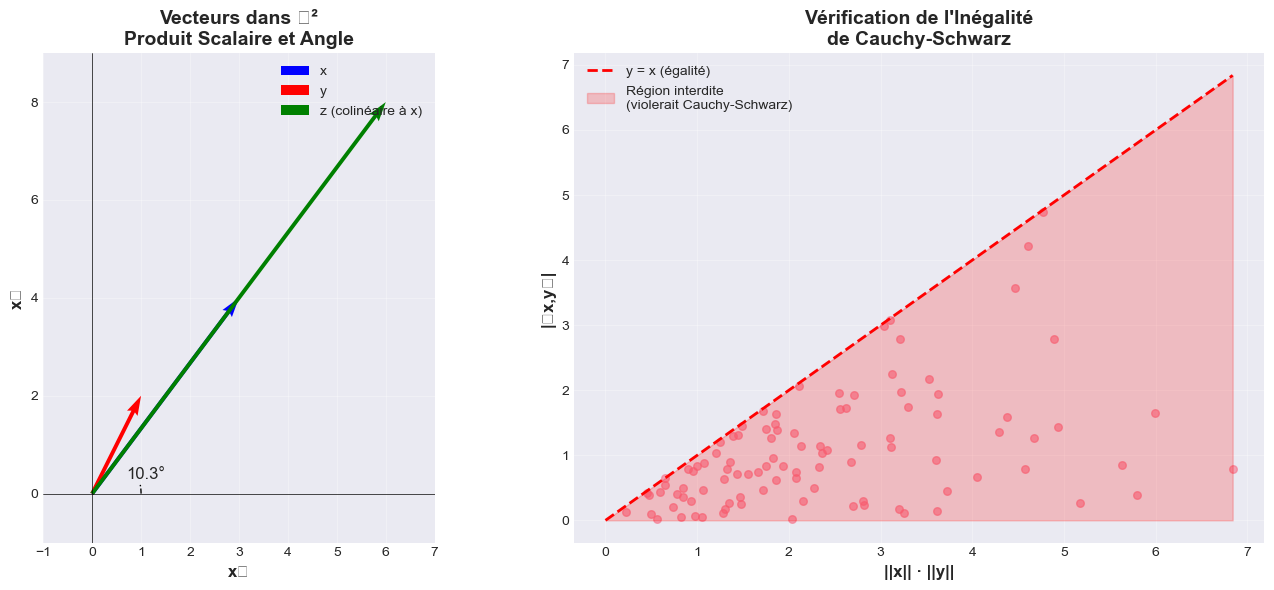

In [27]:
def produit_scalaire(x, y):
    """Produit scalaire : ⟨x,y⟩ = Σxᵢyᵢ = x^T y"""
    return np.dot(x, y)

def norme_induite(x):
    """Norme induite par le produit scalaire : ||x|| = √⟨x,x⟩"""
    return np.sqrt(produit_scalaire(x, x))

# Exemples de vecteurs
x = np.array([3, 4])
y = np.array([1, 2])
z = np.array([6, 8])  # Colinéaire à x

print("=== Produit Scalaire et Espace de Hilbert ===")
print("\nDéfinition : ℝⁿ avec ⟨x,y⟩ = Σxᵢyᵢ est un espace de Hilbert")
print("\nExemples :")
print(f"x = {x}, y = {y}")
print(f"\n⟨x,y⟩ = {produit_scalaire(x, y)}")
print(f"||x|| = √⟨x,x⟩ = {norme_induite(x):.4f}")
print(f"||y|| = {norme_induite(y):.4f}")

# Inégalité de Cauchy-Schwarz
print("\n=== Inégalité de Cauchy-Schwarz ===")
print("\nThéorème : |⟨x,y⟩| ≤ ||x|| · ||y||")
print("avec égalité ⟺ x et y colinéaires\n")

produit_xy = abs(produit_scalaire(x, y))
produit_normes_xy = norme_induite(x) * norme_induite(y)
print(f"Vecteurs x et y (NON colinéaires) :")
print(f"  |⟨x,y⟩| = {produit_xy:.4f}")
print(f"  ||x|| · ||y|| = {produit_normes_xy:.4f}")
print(f"  {produit_xy:.4f} < {produit_normes_xy:.4f} ✓ (inégalité stricte)")

produit_xz = abs(produit_scalaire(x, z))
produit_normes_xz = norme_induite(x) * norme_induite(z)
print(f"\nVecteurs x et z (COLINÉAIRES, z = 2x) :")
print(f"  |⟨x,z⟩| = {produit_xz:.4f}")
print(f"  ||x|| · ||z|| = {produit_normes_xz:.4f}")
print(f"  {produit_xz:.4f} = {produit_normes_xz:.4f} ✓ (ÉGALITÉ)")

# Angle entre vecteurs
def angle_vecteurs(x, y):
    """Calcule l'angle entre deux vecteurs"""
    cos_theta = produit_scalaire(x, y) / (norme_induite(x) * norme_induite(y))
    return np.arccos(np.clip(cos_theta, -1, 1))

theta_xy = angle_vecteurs(x, y)
print(f"\nAngle entre x et y : {np.degrees(theta_xy):.2f}°")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique 1: Vecteurs et produit scalaire
origin = np.array([0, 0])
ax1.quiver(*origin, *x, angles='xy', scale_units='xy', scale=1, color='blue', width=0.01, label='x')
ax1.quiver(*origin, *y, angles='xy', scale_units='xy', scale=1, color='red', width=0.01, label='y')
ax1.quiver(*origin, *z, angles='xy', scale_units='xy', scale=1, color='green', width=0.01, label='z (colinéaire à x)')

# Dessiner l'angle
angle_arc = np.linspace(0, theta_xy, 50)
radius = 1
ax1.plot(radius * np.cos(angle_arc), radius * np.sin(angle_arc), 'k--', linewidth=1)
ax1.text(0.7, 0.3, f'{np.degrees(theta_xy):.1f}°', fontsize=12)

ax1.set_xlim([-1, 7])
ax1.set_ylim([-1, 9])
ax1.set_xlabel('x₁', fontweight='bold', fontsize=12)
ax1.set_ylabel('x₂', fontweight='bold', fontsize=12)
ax1.set_title('Vecteurs dans ℝ²\nProduit Scalaire et Angle', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Graphique 2: Vérification de Cauchy-Schwarz
# Générer plusieurs paires de vecteurs
np.random.seed(42)
n_tests = 100
produits = []
produits_normes = []

for _ in range(n_tests):
    v1 = np.random.randn(3)
    v2 = np.random.randn(3)
    produits.append(abs(produit_scalaire(v1, v2)))
    produits_normes.append(norme_induite(v1) * norme_induite(v2))

ax2.scatter(produits_normes, produits, alpha=0.6, s=30)
max_val = max(max(produits_normes), max(produits))
ax2.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='y = x (égalité)')
ax2.fill_between([0, max_val], [0, max_val], alpha=0.2, color='red', 
                 label='Région interdite\n(violerait Cauchy-Schwarz)')
ax2.set_xlabel('||x|| · ||y||', fontweight='bold', fontsize=12)
ax2.set_ylabel('|⟨x,y⟩|', fontweight='bold', fontsize=12)
ax2.set_title('Vérification de l\'Inégalité\nde Cauchy-Schwarz', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('produit_scalaire.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Application 1.7 : Projection Orthogonale

### Projection sur un sous-espace et Applications ML

In [ ]:
def projection_orthogonale(x, v):
    """Projection de x sur le vecteur v : proj_v(x) = (⟨x,v⟩/⟨v,v⟩) v"""
    return (produit_scalaire(x, v) / produit_scalaire(v, v)) * v

def projection_plan(x, v1, v2):
    """Projection de x sur le plan engendré par v1 et v2 (orthogonaux)"""
    return projection_orthogonale(x, v1) + projection_orthogonale(x, v2)

# Exemple en 3D
x = np.array([3, 4, 5])
v1 = np.array([1, 0, 0])  # Axe x
v2 = np.array([0, 1, 0])  # Axe y

proj_x = projection_orthogonale(x, v1)
proj_plan = projection_plan(x, v1, v2)
residuel = x - proj_plan

print("=== Projection Orthogonale ===")
print(f"\nVecteur x = {x}")
print(f"\nProjection sur l'axe x (v1={v1}) :")
print(f"  proj_v1(x) = {proj_x}")
print(f"\nProjection sur le plan xy (engendré par v1 et v2) :")
print(f"  proj_plan(x) = {proj_plan}")
print(f"  Résidu (composante orthogonale) = {residuel}")
print(f"\nVérification : ⟨résidu, proj⟩ = {produit_scalaire(residuel, proj_plan):.10f} ≈ 0 ✓")
print(f"Distance minimale : ||x - proj|| = {norme_induite(residuel):.4f}")

# Application : Régression linéaire
print("\n=== Application : Régression Linéaire ===")
print("\nLa régression linéaire est une PROJECTION ORTHOGONALE")
print("du vecteur y (observations) sur l'espace engendré par les colonnes de X")

# Générer des données synthétiques
np.random.seed(42)
n = 50
X_data = np.random.randn(n, 2)
X_with_intercept = np.column_stack([np.ones(n), X_data])
beta_true = np.array([2, 3, -1])
y = X_with_intercept @ beta_true + np.random.randn(n) * 0.5

# Résolution par les moindres carrés (projection orthogonale)
beta_hat = np.linalg.lstsq(X_with_intercept, y, rcond=None)[0]
y_pred = X_with_intercept @ beta_hat
residus = y - y_pred

print(f"\nCoefficients vrais : β = {beta_true}")
print(f"Coefficients estimés : β̂ = {beta_hat}")
print(f"\nVérification de l'orthogonalité :")
for i in range(X_with_intercept.shape[1]):
    ortho = produit_scalaire(X_with_intercept[:, i], residus)
    print(f"  ⟨X[:, {i}], résidus⟩ = {ortho:.10f} ≈ 0 ✓")

# Visualisation
fig = plt.figure(figsize=(16, 5))

# Sous-graphique 1: Projection en 3D
ax1 = fig.add_subplot(131, projection='3d')
# Vecteur original
ax1.quiver(0, 0, 0, x[0], x[1], x[2], color='blue', arrow_length_ratio=0.1, linewidth=3, label='x')
# Projection
ax1.quiver(0, 0, 0, proj_plan[0], proj_plan[1], proj_plan[2], 
          color='red', arrow_length_ratio=0.1, linewidth=3, label='proj(x)')
# Résidu
ax1.quiver(proj_plan[0], proj_plan[1], proj_plan[2], residuel[0], residuel[1], residuel[2],
          color='green', arrow_length_ratio=0.1, linewidth=3, label='résidu')
# Plan xy
xx, yy = np.meshgrid(range(-1, 5), range(-1, 6))
zz = np.zeros_like(xx)
ax1.plot_surface(xx, yy, zz, alpha=0.2, color='yellow')
ax1.set_xlabel('x₁', fontweight='bold')
ax1.set_ylabel('x₂', fontweight='bold')
ax1.set_zlabel('x₃', fontweight='bold')
ax1.set_title('Projection sur le Plan xy', fontweight='bold')
ax1.legend()

# Sous-graphique 2: Régression linéaire (cas 2D simple)
ax2 = fig.add_subplot(132)
ax2.scatter(X_data[:, 0], y, alpha=0.6, label='Données')
sort_idx = np.argsort(X_data[:, 0])
ax2.plot(X_data[sort_idx, 0], y_pred[sort_idx], 'r-', linewidth=2, label='Régression (projection)')

# Dessiner quelques résidus
for i in range(0, n, 5):
    ax2.plot([X_data[i, 0], X_data[i, 0]], [y[i], y_pred[i]], 'g--', alpha=0.5, linewidth=1)

ax2.set_xlabel('X', fontweight='bold', fontsize=12)
ax2.set_ylabel('y', fontweight='bold', fontsize=12)
ax2.set_title('Régression Linéaire\n(projection orthogonale)', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Sous-graphique 3: Résidus
ax3 = fig.add_subplot(133)
ax3.scatter(y_pred, residus, alpha=0.6)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('Valeurs prédites', fontweight='bold', fontsize=12)
ax3.set_ylabel('Résidus', fontweight='bold', fontsize=12)
ax3.set_title('Résidus Orthogonaux\naux Prédictions', fontweight='bold', fontsize=14)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('projection_orthogonale.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== PCA (Principal Component Analysis) ===")
print("PCA = projection sur un sous-espace de dimension réduite")
print("qui maximise la variance (équivalent à minimiser l'erreur de projection)")

## 7. Synthèse : Espaces Complets et de Hilbert

In [ ]:
# Tableau comparatif des espaces
print("="*80)
print("SYNTHÈSE : CONVERGENCE, ESPACES COMPLETS ET HILBERT")
print("="*80)

print("\n1. CONVERGENCE DE SUITES")
print("   • Définition : xₙ → x si ∀ε > 0, ∃N, ∀n ≥ N : d(xₙ,x) < ε")
print("   • Dans ℝⁿ : convergence ⟺ convergence composante par composante")
print("   • Propriétés : limite unique, suite convergente est bornée")

print("\n2. SUITES DE CAUCHY")
print("   • Définition : ∀ε > 0, ∃N, ∀m,n ≥ N : d(xₘ,xₙ) < ε")
print("   • Théorème : Suite convergente ⟹ Suite de Cauchy")
print("   • Réciproque : Vraie SEULEMENT dans les espaces COMPLETS")

print("\n3. ESPACES COMPLETS")
print("   • Définition : Toute suite de Cauchy converge")
print("   • Exemples :")
print("     ✓ ℝⁿ (toutes normes)")
print("     ✓ ℝ (complétion de ℚ)")
print("     ✓ C([a,b]) avec ||f||∞")
print("   • Contre-exemples :")
print("     ✗ ℚ (suite approximant √2 ne converge pas dans ℚ)")

print("\n4. SÉRIES NUMÉRIQUES")
print("   • Série géométrique : Σrⁿ = 1/(1-r) si |r| < 1")
print("   • Série exponentielle : Σxⁿ/n! = eˣ (convergence absolue ∀x)")
print("   • Série harmonique : Σ1/n diverge")
print("   • Série alternée : Σ(-1)ⁿ⁺¹/n = ln(2) (convergence conditionnelle)")

print("\n5. ESPACES DE BANACH")
print("   • Définition : Espace vectoriel normé COMPLET")
print("   • Tous les espaces de Hilbert sont des espaces de Banach")

print("\n6. ESPACES DE HILBERT")
print("   • Définition : Espace avec produit scalaire, COMPLET")
print("   • Produit scalaire : ⟨x,y⟩ = Σxᵢyᵢ sur ℝⁿ")
print("   • Norme induite : ||x|| = √⟨x,x⟩")
print("   • Inégalité de Cauchy-Schwarz : |⟨x,y⟩| ≤ ||x|| · ||y||")

print("\n7. PROJECTION ORTHOGONALE")
print("   • Théorème : Dans un Hilbert, ∃! projection sur sous-espace fermé")
print("   • Applications :")
print("     - Régression linéaire = projection orthogonale")
print("     - PCA = projection sur sous-espace variance maximale")

print("\n8. IMPORTANCE EN ML/FINANCE")
print("   • Convergence garantie des algorithmes itératifs")
print("   • Théorèmes de point fixe (nécessitent complétude)")
print("   • Optimisation : descente de gradient converge vers minimum")
print("   • Projections : régression, réduction de dimension")

print("\n" + "="*80)

# Hiérarchie des espaces
print("\nHIÉRARCHIE DES ESPACES :")
print("")
print("  Espace métrique")
print("       ↓")
print("  Espace métrique COMPLET")
print("       ↓")
print("  Espace vectoriel normé COMPLET = ESPACE DE BANACH")
print("       ↓")
print("  Espace avec produit scalaire COMPLET = ESPACE DE HILBERT")
print("")
print("="*80)

print("\nFichiers générés :")
print("  • convergence_suite.png")
print("  • convergence_Rn.png")
print("  • convergence_gradient.png")
print("  • proprietes_suites.png")
print("  • suites_cauchy.png")
print("  • serie_geometrique.png")
print("  • serie_exponentielle.png")
print("  • convergence_conditionnelle.png")
print("  • produit_scalaire.png")
print("  • projection_orthogonale.png")
print("="*80)